In [1]:
import pandas as pd
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Drop the species column (this column is not used in clustering)
# species is the target, and we're performing unsupervised learning (no labels)
# species = iris.target  # Uncomment this if you want to store the species labels, but we won't use them here

# Show first few rows of the data
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


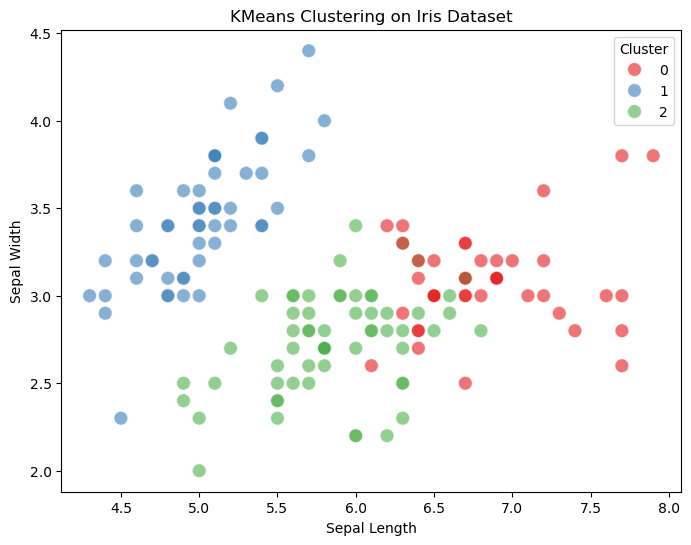

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans clustering with 3 clusters (since there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='kmeans_cluster', palette='Set1', s=100, alpha=0.6)
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Cluster')
plt.show()


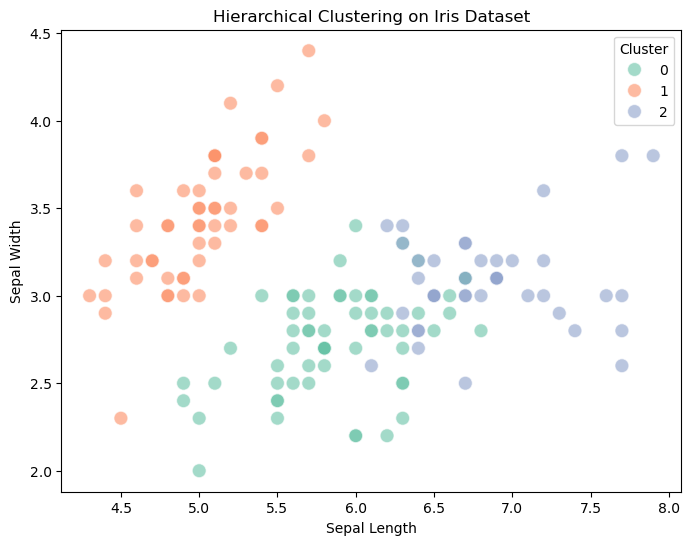

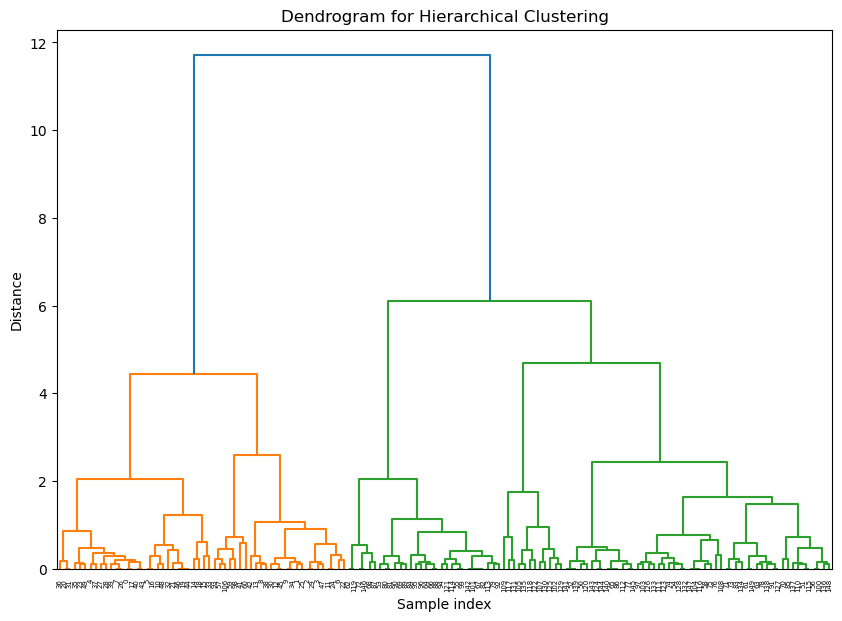

In [5]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
data['hierarchical_cluster'] = hierarchical.fit_predict(data)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='hierarchical_cluster', palette='Set2', s=100, alpha=0.6)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Cluster')
plt.show()

# Dendrogram for Hierarchical Clustering
linked = linkage(data[['sepal length (cm)', 'sepal width (cm)']], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
